### Projeto Alura Store

##### O objetivo desse projeto é ajudar o Sr. João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, serão analisados dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store.

##### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, FixedLocator
import seaborn as sns




##### Importando os dados

In [3]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [4]:
print(loja1.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [5]:
colunas_renomeadas = {'Categoria do Produto':'Categoria_do_Produto', 'Preço':'Preco', 'Data da Compra':'Data_da_Compra',
                      'Local da compra':'Local_da_Compra', 'Avaliação da compra':'Avaliacao_da_Compra', 
                      'Tipo de pagamento':'Tipo_de_Pagamento', 'Quantidade de parcelas':'Quantidade_de_Parcelas'}

lojas = {'loja1': loja1, 'loja2': loja2, 'loja3': loja3, 'loja4': loja4}

for nome, df in lojas.items(): 
    lojas[nome] = df.rename(columns=colunas_renomeadas)


In [6]:
#Convertendo as datas para date time, para fazer análises mensais e anuais das lojas.
for nome, df in lojas.items():
    df['Data_da_Compra'] = pd.to_datetime(df['Data_da_Compra'], dayfirst = True)
    df['Ano'] = df['Data_da_Compra'].dt.year
    df['Mes'] = df['Data_da_Compra'].dt.month

##### Análise de vendas por loja:

In [7]:
vendas_por_loja = {nome: df['Preco'].count() for nome, df in lojas.items()}

print(vendas_por_loja)

{'loja1': 2359, 'loja2': 2359, 'loja3': 2359, 'loja4': 2358}


##### Faturamento por loja:

###### Analisando o faturamento bruto das lojas o cenário se desenha da seguinte forma: 

###### A loja 4 possui o menor faturamento, de R$ 1.384.497,58, sendo a loja 1 a que possui o maior faturamento, de R$ 1.534.509,12.
###### Analisando o faturamento anual, também foram essas duas que tiveram a maior queda do ano anterior (2022)

In [8]:
faturamentos = {nome: df['Preco'].sum() for nome, df in lojas.items()}

maior_fat = max(faturamentos, key=faturamentos.get)
menor_fat = min(faturamentos, key=faturamentos.get)

fat_ordem = dict(sorted(faturamentos.items(), key= lambda item: item[1], reverse=True))

print(f'Maior faturamento: {maior_fat} com R$ {faturamentos[maior_fat]:,.2f}'.replace(',', 'X').replace('.',',').replace('X','.'))
print(f'Menor faturamento: {menor_fat} com R$ {faturamentos[menor_fat]:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

for loja, valor in fat_ordem.items():
    formatado = f'R$ {valor:,.2f}'.replace(',','X').replace('.',',').replace('X','.')
    print(f'{loja}: {formatado}')

Maior faturamento: loja1 com R$ 1.534.509,12
Menor faturamento: loja4 com R$ 1.384.497,58
loja1: R$ 1.534.509,12
loja2: R$ 1.488.459,06
loja3: R$ 1.464.025,03
loja4: R$ 1.384.497,58


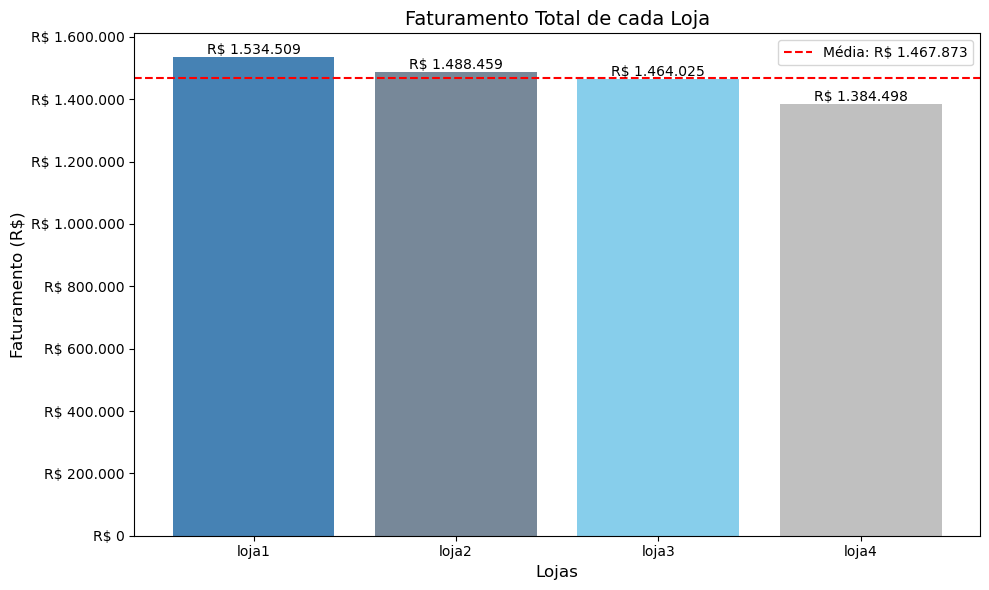

In [9]:

lojas_fat = list(fat_ordem.keys())
valores = list(fat_ordem.values())
media = sum(valores)/ len(valores)

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas_fat, valores, color= cores)
plt.title('Faturamento Total de cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))
plt.xticks(rotation=0)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), 
    f'R$ {valor:,.0f}'.replace(',','X').replace('.',',').replace('X','.'),
ha='center', va='bottom', fontsize=10) 

plt.axhline(y=media, color='red', linestyle='--', linewidth=1.5, label=f'Média: R$ {media:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
plt.legend()
plt.tight_layout()
plt.savefig('faturamento_total_loja.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
faturamento_anual = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Ano')
                .agg({'Preco': 'sum'})
                .assign(Faturamento=lambda x: round(x['Preco'], 2))
                ['Faturamento'])
    

    faturamento_anual[nome] = agrupado.to_dict()

df_faturamento = pd.DataFrame(faturamento_anual)

df_faturamento = df_faturamento.T

df_fat_format = df_faturamento.map(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.') if pd.notnull(x) else '_')

print(df_fat_format)

                2020           2021           2022           2023
loja1  R$ 491.911,51  R$ 482.829,91  R$ 422.086,24  R$ 137.681,46
loja2  R$ 427.288,25  R$ 468.288,89  R$ 477.635,56  R$ 115.246,36
loja3  R$ 428.943,09  R$ 483.938,91  R$ 467.250,70   R$ 83.892,33
loja4  R$ 441.129,52  R$ 463.763,27  R$ 402.961,23   R$ 76.643,56


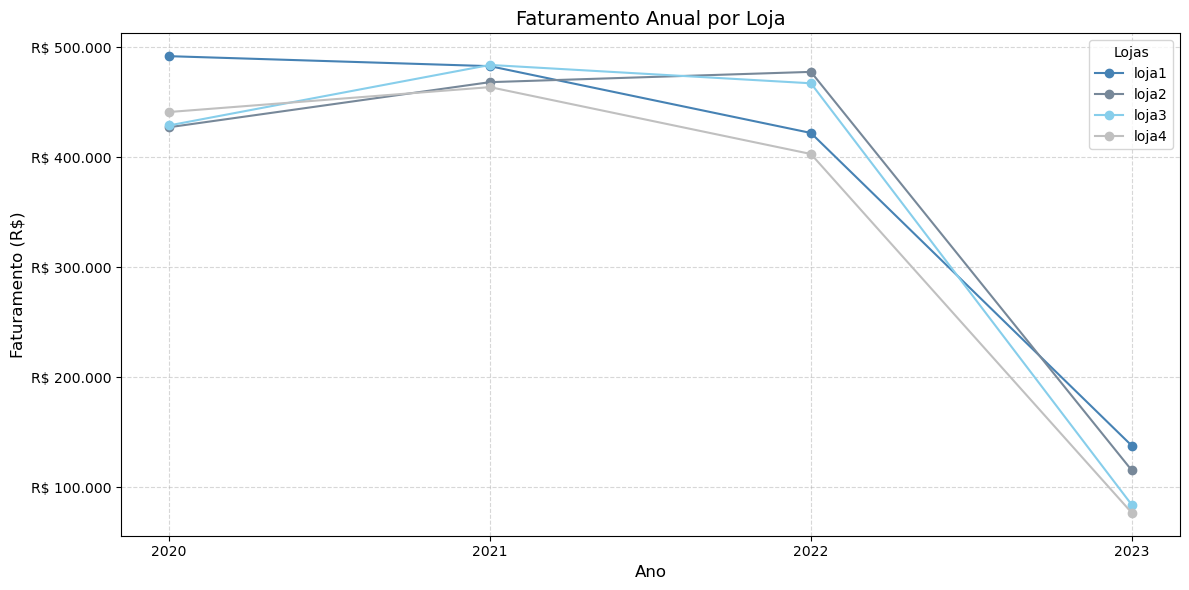

In [11]:
df_plot = df_faturamento.T
df_plot.index = df_plot.index.map(int) #para garantir que os anos no eixo x sejam inteiros

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(12,6))

for idx, loja in enumerate(df_plot.columns):
    anos_validos = df_plot[loja].dropna().index
    valores_validos = df_plot[loja].dropna().values
    plt.plot(anos_validos, valores_validos, marker='o', label=loja, color=cores[idx])

plt.title('Faturamento Anual por Loja', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

#Definindo os anos como localizações fixas e formatar como inteiros
plt.gca().xaxis.set_major_locator(FixedLocator(df_plot.index))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title='Lojas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('faturamento_anual_por_loja.png', dpi=300, bbox_inches='tight')
plt.show()


##### Lucro por loja:

###### Analisando o Lucro (Faturamento - Frete) o cenário se mantém o mesmo com a loja 4 obtendo o pior resultado, de R$ 1.310.741,70 e a loja 1 o melhor de R$ 1.452.671,15. 

In [12]:
lucros = {nome: df['Preco'].sum() - df['Frete'].sum() for nome, df in lojas.items()}

maior_lucro = max(lucros, key=lucros.get)
menor_lucro = min(lucros, key=lucros.get)

lucro_ordem = dict(sorted(lucros.items(), key= lambda item: item[1], reverse=True))

print(f'Maior lucro: {maior_lucro} com R$ {lucros[maior_lucro]:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
print(f'Menor lucro: {menor_lucro} com R$ {lucros[menor_lucro]:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

for loja, valor in lucro_ordem.items():
    formatado = f'R$ {valor:,.2f}'.replace(',','X').replace('.',',').replace('X','.')
    print(f'{loja}: {formatado}')

Maior lucro: loja1 com R$ 1.452.671,15
Menor lucro: loja4 com R$ 1.310.741,70
loja1: R$ 1.452.671,15
loja2: R$ 1.409.144,90
loja3: R$ 1.386.002,37
loja4: R$ 1.310.741,70


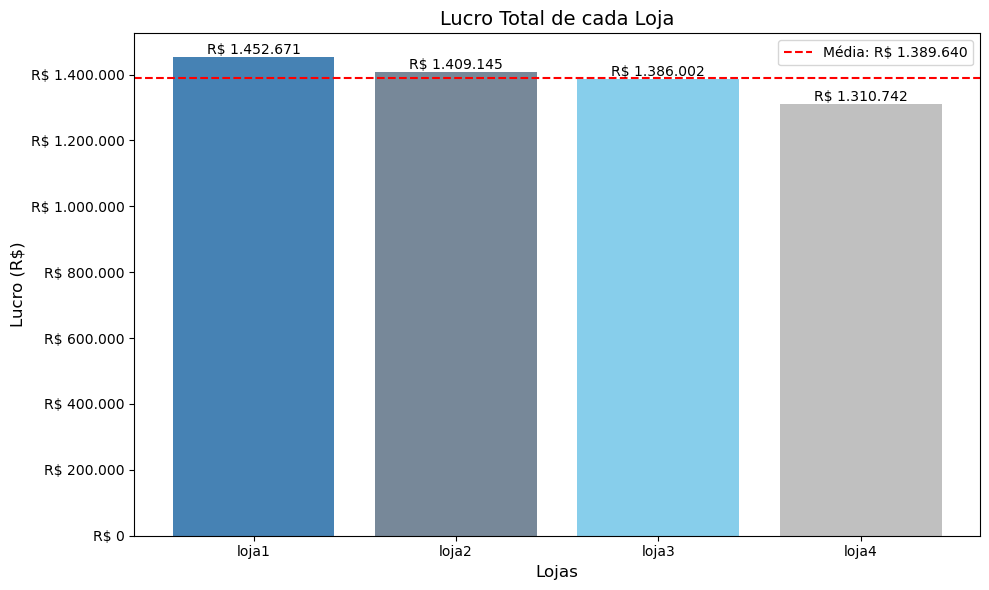

In [13]:
lojas_lucro = list(lucro_ordem.keys())
valores = list(lucro_ordem.values())
media = sum(valores)/ len(valores)

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas_lucro, valores, color= cores)
plt.title('Lucro Total de cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Lucro (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))
plt.xticks(rotation=0)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), 
    f'R$ {valor:,.0f}'.replace(',','X').replace('.',',').replace('X','.'),
ha='center', va='bottom', fontsize=10) 

plt.axhline(y=media, color='red', linestyle='--', linewidth=1.5, label=f'Média: R$ {media:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
plt.legend()
plt.tight_layout()
plt.savefig('lucro_total_loja.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
lucro_anual = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Ano')
                .agg({'Preco': 'sum', 'Frete': 'sum',})
                .assign(Lucro_Medio=lambda x: round(x['Preco']-x['Frete'], 2))
                ['Lucro_Medio'])
    

    lucro_anual[nome] = agrupado.to_dict()

df_lucro = pd.DataFrame(lucro_anual)

df_lucro = df_lucro.T

df_lucro_format = df_lucro.map(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.') if pd.notnull(x) else '_')

print(df_lucro_format)

                2020           2021           2022           2023
loja1  R$ 465.583,43  R$ 457.203,49  R$ 399.602,68  R$ 130.281,55
loja2  R$ 404.397,85  R$ 443.464,53  R$ 452.175,31  R$ 109.107,21
loja3  R$ 406.186,14  R$ 458.091,57  R$ 442.280,01   R$ 79.444,65
loja4  R$ 417.757,05  R$ 438.966,69  R$ 381.420,18   R$ 72.597,78


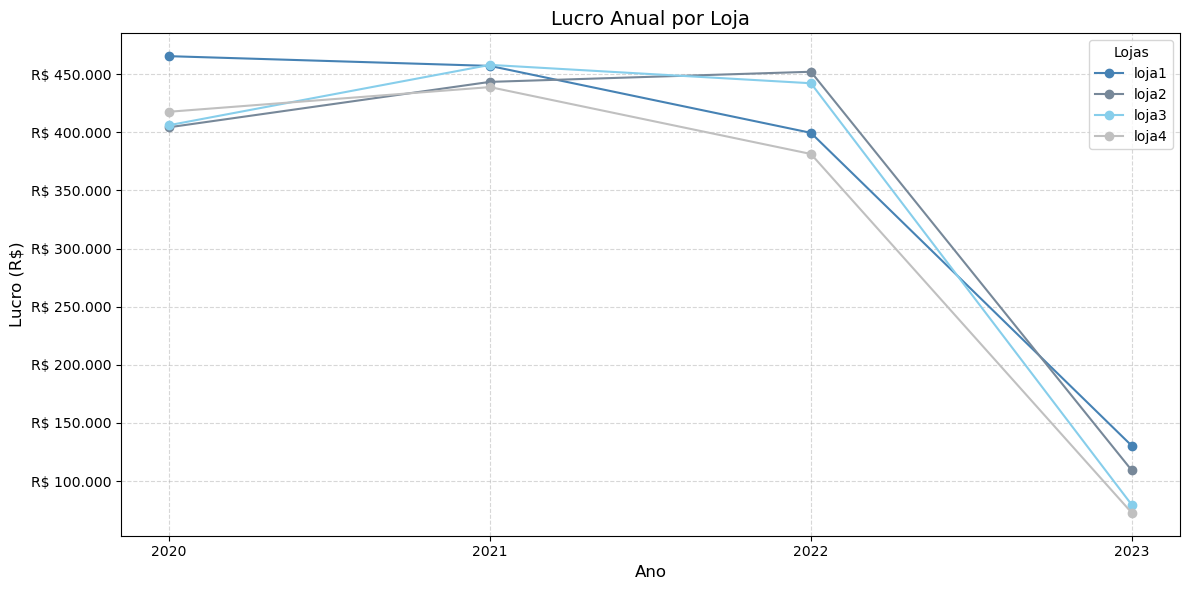

In [15]:
df_plot = df_lucro.T
df_plot.index = df_plot.index.map(int) #para garantir que os anos no eixo x sejam inteiros

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(12,6))

for idx, loja in enumerate(df_plot.columns):
    anos_validos = df_plot[loja].dropna().index
    valores_validos = df_plot[loja].dropna().values
    plt.plot(anos_validos, valores_validos, marker='o', label=loja, color=cores[idx])

plt.title('Lucro Anual por Loja', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Lucro (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

#Definindo os anos como localizações fixas e formatar como inteiros
plt.gca().xaxis.set_major_locator(FixedLocator(df_plot.index))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title='Lojas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('lucro_anual_por_loja.png', dpi=300, bbox_inches='tight')
plt.show()

##### Ticket Médio por loja:

###### O Ticket médio das lojas não difere do cenário do Lucro, a loja 4 se mantém com o pior indíce dentre as lojas, R$ 555,87.

In [16]:
tickets = {
    nome: round((df['Preco'].sum() - df['Frete'].sum()) / df['Preco'].count(), 2)
    for nome, df in lojas.items()
}

maior_ticket = max(tickets, key=tickets.get)
menor_ticket = min(tickets, key=tickets.get)

ticket_ordem = dict(sorted(tickets.items(), key= lambda item: item[1], reverse=True))

print(f'Maior ticket médio: {maior_ticket} com R$ {tickets[maior_ticket]:,.2f}'.replace('.',','))
print(f'Menor ticket médio: {menor_ticket} com R$ {tickets[menor_ticket]:,.2f}'.replace('.',','))

for loja, valor in ticket_ordem.items():
    formatado = f'R$ {valor:,.2f}'.replace('.',',')
    print(f'{loja}: {formatado}')

Maior ticket médio: loja1 com R$ 615,80
Menor ticket médio: loja4 com R$ 555,87
loja1: R$ 615,80
loja2: R$ 597,35
loja3: R$ 587,54
loja4: R$ 555,87


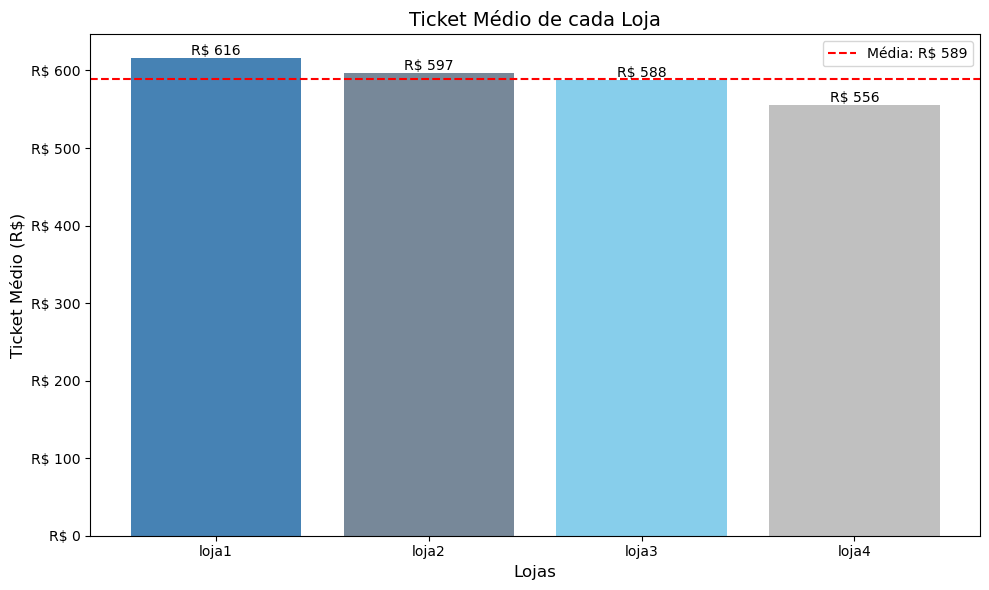

In [17]:
lojas_ticket = list(ticket_ordem.keys())
valores = list(ticket_ordem.values())
media = sum(valores)/ len(valores)

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace('.', ',')

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas_ticket, valores, color= cores)
plt.title('Ticket Médio de cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Ticket Médio (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))
plt.xticks(rotation=0)

for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), 
    f'R$ {valor:,.0f}'.replace(',','X').replace('.',',').replace('X','.'),
ha='center', va='bottom', fontsize=10) 

plt.axhline(y=media, color='red', linestyle='--', linewidth=1.5, label=f'Média: R$ {media:,.0f}'.replace('.', ','))
plt.legend()
plt.tight_layout()
plt.savefig('ticket_medio_loja.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
ticket_anual = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Ano')
                .agg({'Preco': 'sum', 'Frete': 'sum', 'Produto': 'count'})
                .assign(Ticket_Medio=lambda x: round((x['Preco']-x['Frete'])/x['Produto'], 2))
                ['Ticket_Medio'])
    

    ticket_anual[nome] = agrupado.to_dict()

df_tickets = pd.DataFrame(ticket_anual)

df_tickets = df_tickets.T

df_tickets_format = df_tickets.map(lambda x: f'R$ {x:,.2f}'.replace('.',',') if pd.notnull(x) else '_')

print(df_tickets_format)

            2020       2021       2022       2023
loja1  R$ 651,17  R$ 618,68  R$ 560,45  R$ 678,55
loja2  R$ 577,71  R$ 584,27  R$ 638,67  R$ 568,27
loja3  R$ 579,44  R$ 619,04  R$ 597,68  R$ 446,32
loja4  R$ 560,75  R$ 590,01  R$ 535,70  R$ 462,41


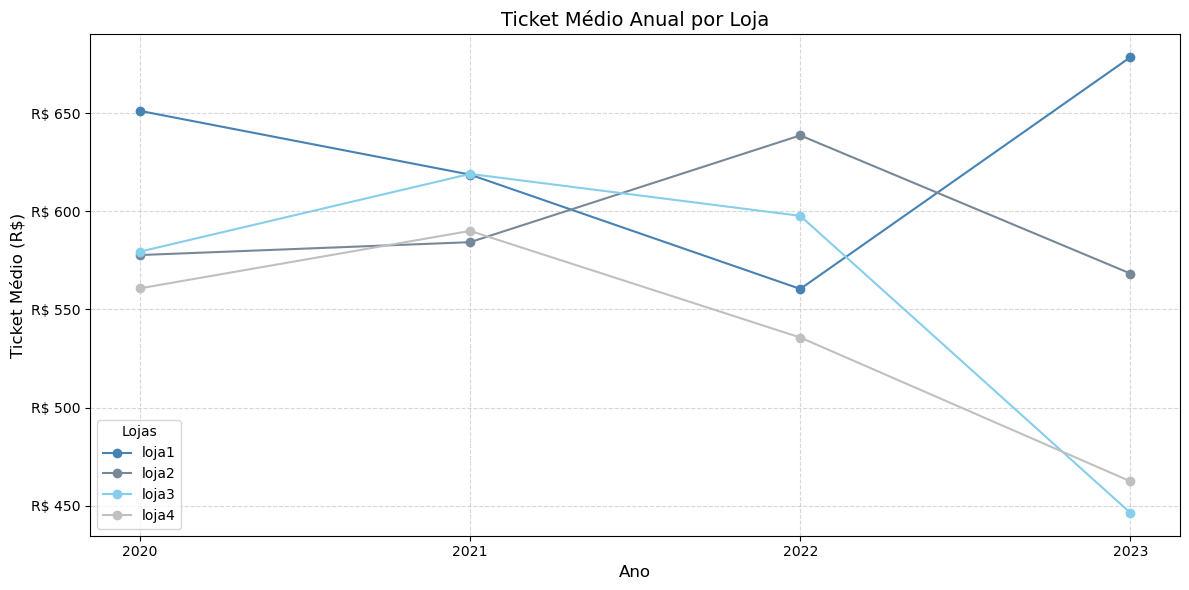

In [19]:
df_plot = df_tickets.T
df_plot.index = df_plot.index.map(int) #para garantir que os anos no eixo x sejam inteiros

cores = ['#4682b4', '#778899', '#87ceeb', '#c0c0c0']

def formatar_em_reais(valor, _):
    return f'R$ {valor:,.0f}'.replace('.', ',')

plt.figure(figsize=(12,6))

for idx, loja in enumerate(df_plot.columns):
    anos_validos = df_plot[loja].dropna().index
    valores_validos = df_plot[loja].dropna().values
    plt.plot(anos_validos, valores_validos, marker='o', label=loja, color=cores[idx])

plt.title('Ticket Médio Anual por Loja', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Ticket Médio (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

#Definindo os anos como localizações fixas e formatar como inteiros
plt.gca().xaxis.set_major_locator(FixedLocator(df_plot.index))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title='Lojas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('ticket_medio_anual_por_loja.png', dpi=300, bbox_inches='tight')
plt.show()

#### Vendas por categoria

##### Faturamento por categoria

###### Analisando o faturamento das lojas dividido por categorias de produto a loja 1 é a que tem os maiores índices nas 3 categorias de maior faturamento, *Eletrônicos*, *Eletrodomésticos* e loja 4 demonstra os piores resultados, porém na categoria *Móveis*, que é a categoria que detém o maior volume de vendas em todas as lojas, a loja 4 detém o segundo maior indíce superando as lojas 1 e 2, sendo essa a que detém o pior índice.

In [20]:
fat_categoria = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Categoria_do_Produto')
                .agg({'Preco': 'sum'})
                .assign(Faturamento=lambda x: round(x['Preco'], 2))
                ['Faturamento'])
    

    fat_categoria[nome] = agrupado.to_dict()

df_fat_categoria = pd.DataFrame(fat_categoria)

df_fat_categoria = df_fat_categoria.T

df_cat_format = df_fat_categoria.map(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.') if pd.notnull(x) else '_')

print(df_cat_format)

         brinquedos eletrodomesticos    eletronicos esporte e lazer  \
loja1  R$ 23.993,78    R$ 484.913,36  R$ 572.659,23    R$ 52.387,55   
loja2  R$ 21.262,21    R$ 464.758,13  R$ 547.773,71    R$ 46.326,09   
loja3  R$ 25.869,20    R$ 438.984,89  R$ 547.699,92    R$ 47.456,10   
loja4  R$ 27.015,67    R$ 377.680,65  R$ 545.966,86    R$ 44.465,65   

      instrumentos musicais        livros         moveis utilidades domesticas  
loja1         R$ 121.731,69  R$ 11.713,92  R$ 250.178,11          R$ 16.931,48  
loja2         R$ 139.987,03  R$ 13.454,35  R$ 235.234,68          R$ 19.662,86  
loja3         R$ 103.174,45  R$ 12.664,70  R$ 268.095,56          R$ 20.080,21  
loja4         R$ 100.136,50  R$ 12.427,77  R$ 256.705,65          R$ 20.098,83  


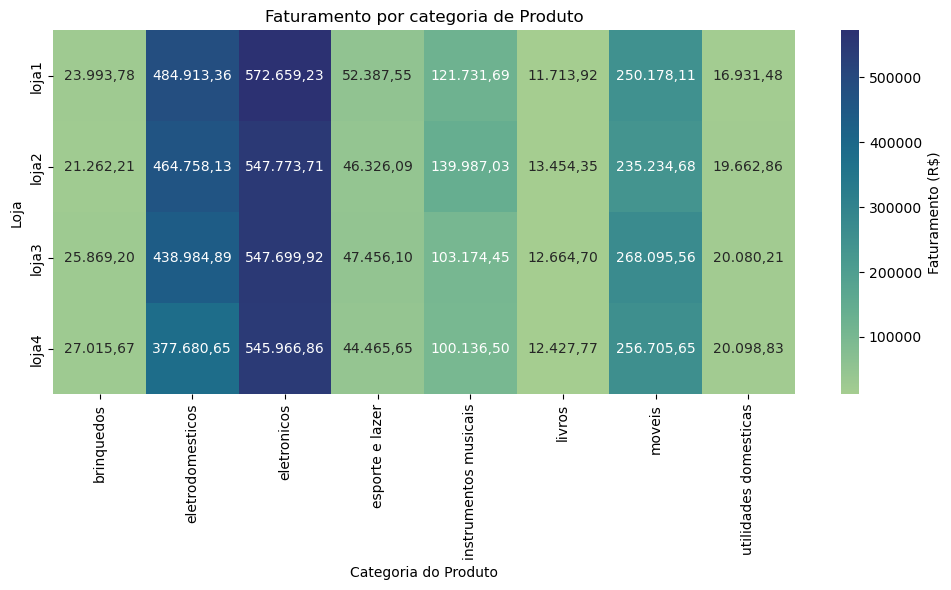

In [33]:
df_heatmap = df_fat_categoria.fillna(0).map(lambda x: f'{x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

plt.figure(figsize=(10,6))
sns.heatmap(df_fat_categoria.fillna(0), annot=df_heatmap, fmt='', cmap='crest', cbar_kws={'label': 'Faturamento (R$)'})

plt.title('Faturamento por categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Loja')
plt.tight_layout()
plt.savefig('faturamento_categoria.png', dpi=300, bbox_inches='tight')
plt.show()

##### Lucro por categoria:

In [26]:
lucro_categ = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Categoria_do_Produto')
                .agg({'Preco': 'sum', 'Frete': 'sum'})
                .assign(Lucro=lambda x: round(x['Preco']-x['Frete'], 2))
                ['Lucro'])
    

    lucro_categ[nome] = agrupado.to_dict()

df_lucro_categ = pd.DataFrame(lucro_categ)

df_lucro_categ = df_lucro_categ.T

df_lucro_format = df_lucro_categ.map(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.') if pd.notnull(x) else '_')

print(df_lucro_format)

         brinquedos eletrodomesticos    eletronicos esporte e lazer  \
loja1  R$ 22.688,29    R$ 459.148,40  R$ 542.040,22    R$ 49.558,44   
loja2  R$ 20.078,59    R$ 440.017,13  R$ 518.689,15    R$ 43.823,28   
loja3  R$ 24.479,80    R$ 415.659,32  R$ 518.559,45    R$ 44.891,58   
loja4  R$ 25.532,67    R$ 357.650,55  R$ 516.862,54    R$ 42.105,53   

      instrumentos musicais        livros         moveis utilidades domesticas  
loja1         R$ 115.219,88  R$ 11.091,43  R$ 236.850,90          R$ 16.073,58  
loja2         R$ 132.576,97  R$ 12.712,86  R$ 222.652,31          R$ 18.594,61  
loja3          R$ 97.696,36  R$ 12.003,02  R$ 253.715,89          R$ 18.996,95  
loja4          R$ 94.864,65  R$ 11.706,73  R$ 243.059,14          R$ 18.959,90  


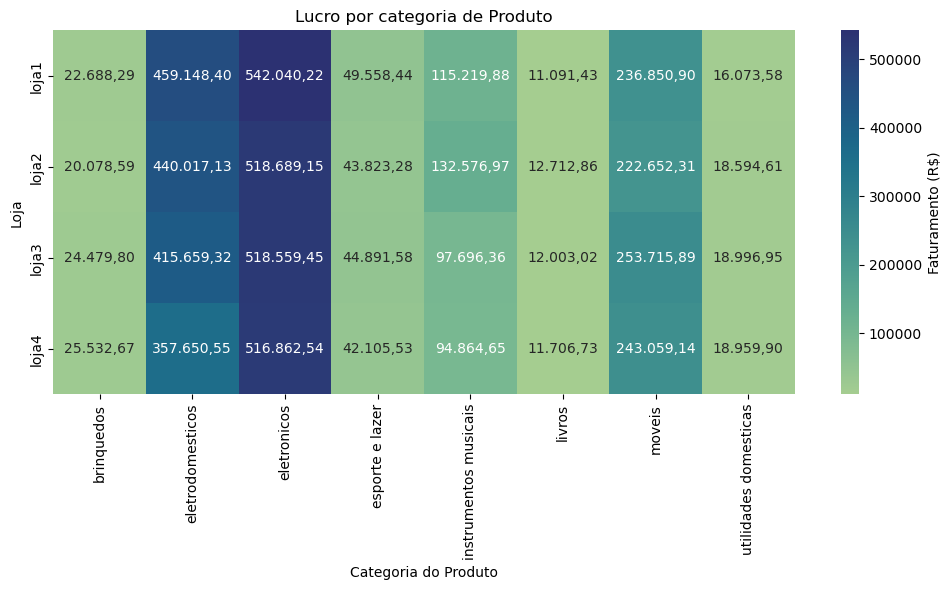

In [27]:
df_heatmap_lucro = df_lucro_categ.fillna(0).map(lambda x: f'{x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

plt.figure(figsize=(10,6))
sns.heatmap(df_lucro_categ.fillna(0), annot=df_heatmap_lucro, fmt='', cmap='crest', cbar_kws={'label': 'Faturamento (R$)'})

plt.title('Lucro por categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Loja')
plt.tight_layout()
plt.show()

##### Produtos mais vendidos:

In [25]:
produtos = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Categoria_do_Produto')
                .agg({'Preco': 'count'})
                .assign(Produtos=lambda x: round(x['Preco'], 2))
                ['Produtos'])
    

    produtos[nome] = agrupado.to_dict()

mais_vendidos= {loja: sorted(categorias.items(), key=lambda item: item[1], reverse=True)[:3]
                for loja, categorias in produtos.items()
                }

print('As 3 categorias mais vendidas por loja são:\n')
for loja, top3 in mais_vendidos.items():
    print(f'{loja}:')
    for categoria, qtd in top3:
        print(f'   - {categoria}: {qtd} vendas')

As 3 categorias mais vendidas por loja são:

loja1:
   - moveis: 465 vendas
   - eletronicos: 448 vendas
   - brinquedos: 324 vendas
loja2:
   - moveis: 442 vendas
   - eletronicos: 422 vendas
   - brinquedos: 313 vendas
loja3:
   - moveis: 499 vendas
   - eletronicos: 451 vendas
   - brinquedos: 315 vendas
loja4:
   - moveis: 480 vendas
   - eletronicos: 451 vendas
   - brinquedos: 338 vendas


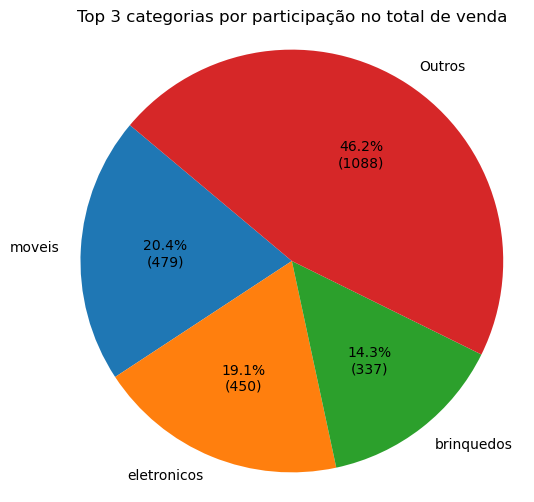

In [34]:
for loja, df in lojas.items():
    total_vendas_loja = df['Categoria_do_Produto'].count()
    agrupado = (
        df.groupby('Categoria_do_Produto')
        .agg({'Preco': 'count'})
        .rename(columns={'Preco': 'Qtd_Vendas'})
    )

top3 = agrupado.sort_values(by='Qtd_Vendas', ascending=False).head(3)
outras = agrupado.drop(index=top3.index)

categorias = top3.index.tolist() + ['Outros']
vendas = top3['Qtd_Vendas'].tolist() + [outras['Qtd_Vendas'].sum()]
percentuais = [v / total_vendas_loja for v in vendas]

plt.figure(figsize=(6,6))
plt.pie(percentuais, labels=categorias, autopct=lambda p: f'{p:.1f}%\n({int(p * total_vendas_loja / 100)})', startangle=140)
plt.title(f'Top 3 categorias por participação no total de venda')
plt.axis('equal')
plt.savefig('categoria_mais_vendidas.png', dpi=300, bbox_inches='tight')
plt.show()

##### Média de avaliação das lojas:

###### A média de avaliação das lojas é muito parecida, a loja 1 é a que obtém o pior resultado, de 3.98 seguida pela segunda pior que é a loja 4, com média 4.00

In [30]:
media_avaliacao = {
    nome: df['Avaliacao_da_Compra'].mean()
    for nome, df in lojas.items()
}

for loja, media in media_avaliacao.items():
    print(f'{loja}: média de avaliação {media:.2f}')

loja1: média de avaliação 3.98
loja2: média de avaliação 4.04
loja3: média de avaliação 4.05
loja4: média de avaliação 4.00


In [31]:
avaliacao_anual = {}

for nome, df in lojas.items():
    agrupado = (df.groupby('Ano')
                .agg({'Avaliacao_da_Compra': 'mean'})
                .assign(Avaliacao_Media=lambda x: round((x['Avaliacao_da_Compra'].round(2))))
                ['Avaliacao_Media'])
    

    avaliacao_anual[nome] = agrupado.to_dict()

df_avaliacao = pd.DataFrame(avaliacao_anual)

df_avaliacao = df_avaliacao.T

df_avaliacao_format = df_avaliacao.map(lambda x: f' {x:,.2f}' if pd.notnull(x) else '_')

print(df_avaliacao_format)

        2020   2021   2022   2023
loja1   4.00   4.00   4.00   4.00
loja2   4.00   4.00   4.00   4.00
loja3   4.00   4.00   4.00   4.00
loja4   4.00   4.00   4.00   4.00


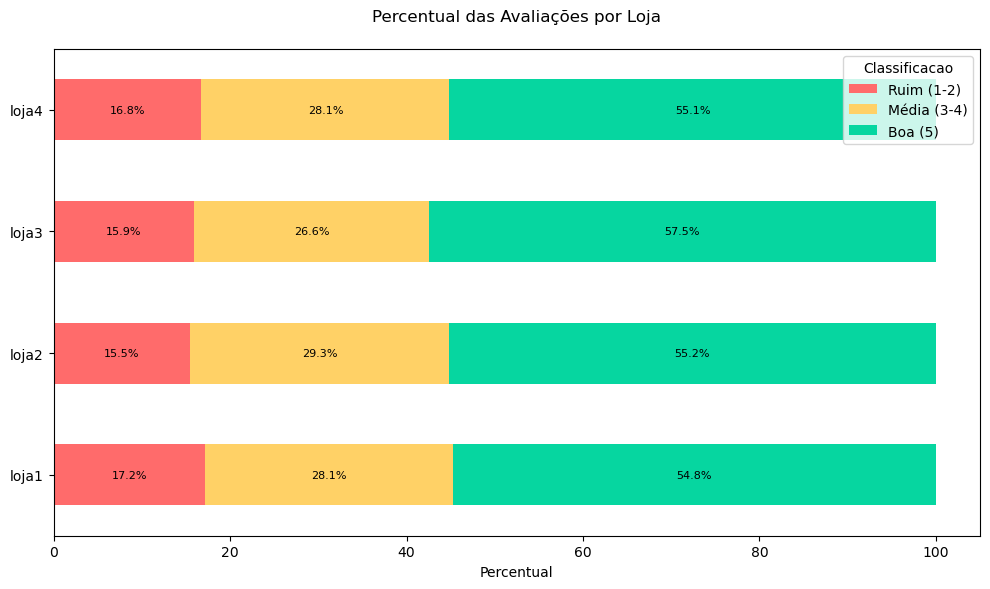

In [35]:
# Verificar as piores classificações
df = pd.concat([df.assign(Loja=nome) for nome, df in lojas.items()], ignore_index=True)

df['Classificacao'] = pd.cut(df['Avaliacao_da_Compra'], 
bins=[0, 2, 4, 5], labels=['Ruim (1-2)', 'Média (3-4)', 'Boa (5)'], right=True)

classificacao = df.groupby(['Loja', 'Classificacao'], observed=True).size().unstack()

classif_percent = classificacao.div(classificacao.sum(axis=1), axis=0) * 100

ax = classif_percent.plot(
    kind='barh', 
    stacked=True, 
    color=['#ff6b6b', '#ffd166', '#06d6a0'],
    figsize=(10,6))
plt.title('Percentual das Avaliações por Loja', pad=20)
plt.xlabel('Percentual')
plt.ylabel('')

for i, loja in enumerate(classif_percent.index):
    left = 0
    for categoria in classif_percent.columns:
        valor = classif_percent.loc[loja, categoria]
        if valor > 0:
            ax.text(left + valor / 2, i, f'{valor:.1f}%',
                    ha='center', va='center', fontsize=8, color='black')
        left += valor

plt.tight_layout()
plt.savefig('avaliacao_lojas.png', dpi=300, bbox_inches='tight')
plt.show()
        



##### Frete Médio por loja:

In [ ]:
frete_medio = {
    nome: df['Frete'].mean()
    for nome, df in lojas.items()
}

for loja, media in frete_medio.items():
    print(f'{loja}: frete médio de {media:.2f}')

loja1: frete médio de 34.69
loja2: frete médio de 33.62
loja3: frete médio de 33.07
loja4: frete médio de 31.28
